In [2]:
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

In [3]:
bunch = load_breast_cancer()

In [4]:
bunch.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
y= bunch.target
X= bunch.data

In [7]:
len(y)

569

In [9]:
knn_model = KNeighborsClassifier()
knn_model.fit(X,y)
y_pred=knn_model.predict(X)
knn_model.score(X,y)

0.9472759226713533

In [10]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.7744569525923577

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame({"y":y,"y_pred":y_pred})

In [14]:
df

,y,y_pred
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
564,0,0
565,0,0
566,0,0
567,0,0


In [15]:
df["correct"]=df.y==df.y_pred

In [16]:
df

,y,y_pred,correct
0,0,0,True
1,0,0,True
2,0,0,True
3,0,1,False
4,0,0,True
...,...,...,...
564,0,0,True
565,0,0,True
566,0,0,True
567,0,0,True


In [18]:
df.correct.sum()

539

In [19]:
len(y)

569

In [20]:
539/569

0.9472759226713533

In [22]:
def knn_model(X,y,n=5):
    model = KNeighborsClassifier(n)
    model.fit(X,y)
    score =model.score(X,y)
    print(score)

In [23]:
knn_model(X,y,5)

0.9472759226713533


In [24]:
knn_model(X,y,7)

0.9437609841827768


In [25]:
knn_model(X,y,9)

0.9420035149384886


In [26]:
knn_model(X,y,11)

0.9402460456942003


In [27]:
from sklearn.model_selection import train_test_split

## Train and test scores

In [31]:
def knn_model(X,y,n=5):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    model = KNeighborsClassifier(n)
    model.fit(X_train,y_train)
    train_score =model.score(X_train,y_train)
    test_score =model.score(X_test,y_test)
    
#     print(f"train score: {train_score}")
#     print(f"test score: {test_score}") 
    return train_score,test_score

In [29]:
knn_model(X,y)

train score: 0.9597989949748744
test score: 0.9181286549707602


In [32]:
knn_model(X,y)

(0.949748743718593, 0.9181286549707602)

In [35]:
train_scores =[]
test_scores=[]
neighbors=range(1,35)
for n in neighbors:
    train_score,test_score=knn_model(X,y)
    train_scores.append(train_score)
    test_scores.append(test_score)
print(f"Train Scores : {train_scores}")
print()
print(f"Test Scores : {test_scores}")

    

Train Scores : [0.949748743718593, 0.9396984924623115, 0.9371859296482412, 0.9447236180904522, 0.9422110552763819, 0.949748743718593, 0.9522613065326633, 0.949748743718593, 0.9422110552763819, 0.9422110552763819, 0.9396984924623115, 0.9321608040201005, 0.9522613065326633, 0.9447236180904522, 0.9472361809045227, 0.9447236180904522, 0.957286432160804, 0.9371859296482412, 0.9472361809045227, 0.9472361809045227, 0.9396984924623115, 0.949748743718593, 0.957286432160804, 0.9321608040201005, 0.9447236180904522, 0.9447236180904522, 0.9396984924623115, 0.9472361809045227, 0.9346733668341709, 0.9472361809045227, 0.9422110552763819, 0.9296482412060302, 0.9472361809045227, 0.9472361809045227]

Test Scores : [0.935672514619883, 0.9415204678362573, 0.9649122807017544, 0.935672514619883, 0.9181286549707602, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.935672514619883, 0.935672514619883, 0.935672514619883, 0.9415204678362573, 0.9239766081871345, 0.9415204678362573, 0.9239766081871345,

In [36]:
from matplotlib import pyplot as plt

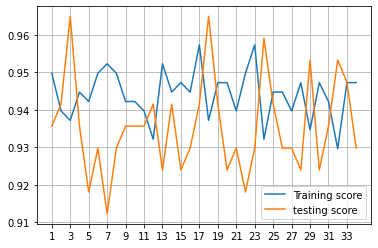

In [42]:
plt.plot(neighbors,train_scores,label="Training score")
plt.plot(neighbors,test_scores,label="testing score")
plt.grid()
plt.xticks(range(1,35,2))
plt.legend();


In [ ]:
we shall use 17 as the hyperparameter.